In [1]:
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from pandas import to_datetime
import statsmodels.api as sm
import locale

locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

'es_ES.UTF-8'

In [2]:
# https://momo.isciii.es/panel_momo/#section-datos

momo = read_csv("data/momo.csv", engine="pyarrow")

In [3]:
nacional_defunciones = momo \
                            .query("ambito == 'nacional'") \
                            .groupby(["fecha_defuncion"])\
                            .agg({
                                "defunciones_observadas": sum,
                                "defunciones_estimadas_base": sum,
                                "defunciones_estimadas_base_q01": sum,
                                "defunciones_estimadas_base_q99": sum,
                                "defunciones_atrib_exc_temp": sum,
                                "defunciones_atrib_def_temp": sum
                            }) \
                            .reset_index()
nacional_defunciones["defunciones_calor"] = nacional_defunciones["defunciones_estimadas_base"] + nacional_defunciones["defunciones_atrib_exc_temp"]


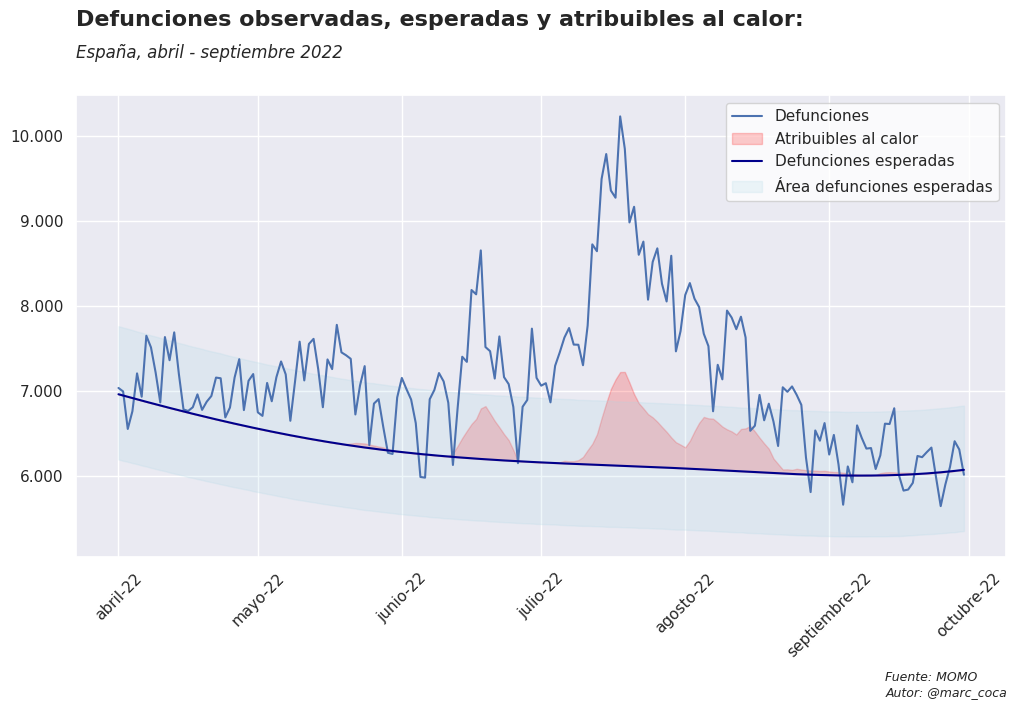

In [4]:
def thousand_separator(x, pos):
    return "{:,.0f}".format(x).replace(",", ".")

nacional_defunciones["fecha_defuncion"] = to_datetime(nacional_defunciones["fecha_defuncion"])
nacional_2022 = nacional_defunciones.query("fecha_defuncion >= '2022-04-01' and fecha_defuncion <= '2022-09-30'").reset_index(drop=True)


sns.set_theme()

fig, ax = plt.subplots(figsize = (12,6))

sns.lineplot(data = nacional_2022, 
             x = "fecha_defuncion",
             y = "defunciones_observadas",
             label = "Defunciones",
             ax = ax)

ax.fill_between(x = nacional_2022["fecha_defuncion"],
                 y1 = nacional_2022["defunciones_estimadas_base"],
                 y2 = nacional_2022["defunciones_calor"],
                 alpha = 0.2,
                 color = "red",
                 label = "Atribuibles al calor")

sns.lineplot(data = nacional_2022, 
             x = "fecha_defuncion",
             y = "defunciones_estimadas_base",
             label = "Defunciones esperadas",
             color = "darkblue",
             ax = ax)

ax.fill_between(x = nacional_2022["fecha_defuncion"],
                 y1 = nacional_2022["defunciones_estimadas_base_q01"],
                 y2 = nacional_2022["defunciones_estimadas_base_q99"],
                 alpha = 0.2,
                 color = "lightblue",
                 label = "Área defunciones esperadas")

ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))

handles, labels = ax.get_legend_handles_labels()

handles.append(plt.fill_between([], [], [], color='lightblue', alpha=0.3))
plt.legend(handles=handles, labels=labels, facecolor = "white")

ax.set_xlabel("")
ax.set_ylabel("")


ax.set_title('Defunciones observadas, esperadas y atribuibles al calor:', fontsize=16, fontweight='bold', pad = 50, loc="left")
ax.text(0, 1.08, 'España, abril - septiembre 2022', fontsize=12, fontstyle='italic', transform=ax.transAxes)
ax.text(0.87, -0.3, 'Fuente: MOMO\nAutor: @marc_coca', fontsize=9, fontstyle='italic', transform=ax.transAxes)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(thousand_separator))


ax.tick_params(axis = "x", rotation = 45)

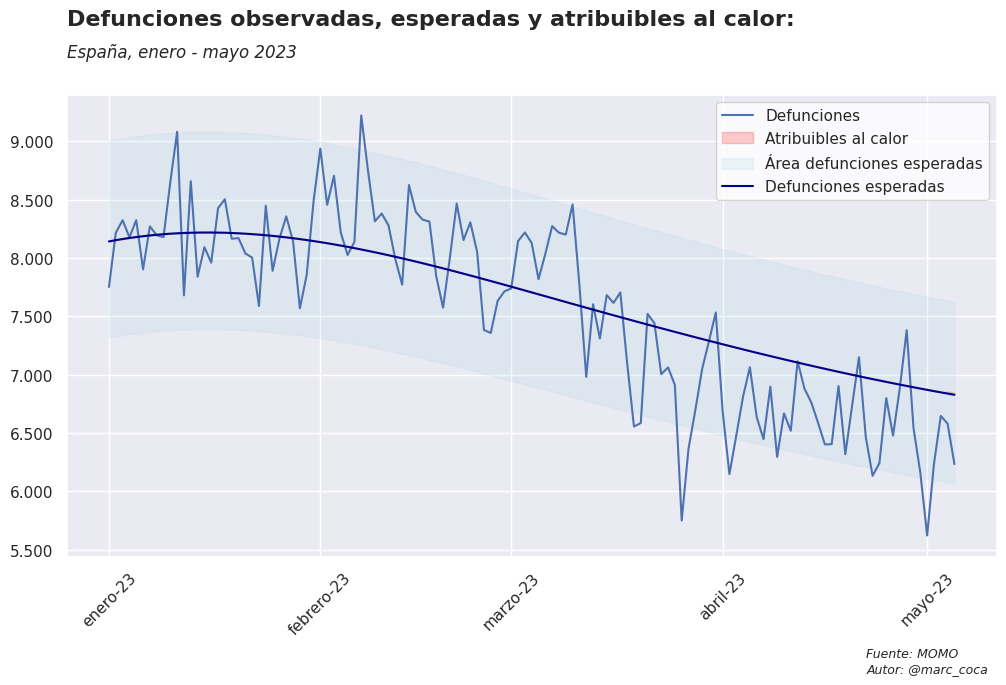

In [5]:
nacional_defunciones["fecha_defuncion"] = to_datetime(nacional_defunciones["fecha_defuncion"])
nacional_2023 = nacional_defunciones.query("fecha_defuncion >= '2023-01-01' and fecha_defuncion <= '2023-05-05'").reset_index(drop=True)


sns.set_theme()

fig, ax = plt.subplots(figsize = (12,6))

sns.lineplot(data = nacional_2023, 
             x = "fecha_defuncion",
             y = "defunciones_observadas",
             label = "Defunciones",
             ax = ax)

ax.fill_between(x = nacional_2023["fecha_defuncion"],
                 y1 = nacional_2023["defunciones_estimadas_base"],
                 y2 = nacional_2023["defunciones_calor"],
                 alpha = 0.2,
                 color = "red",
                 label = "Atribuibles al calor")

ax.fill_between(x = nacional_2023["fecha_defuncion"],
                 y1 = nacional_2023["defunciones_estimadas_base_q01"],
                 y2 = nacional_2023["defunciones_estimadas_base_q99"],
                 alpha = 0.2,
                 color = "lightblue",
                 label = "Área defunciones esperadas")

sns.lineplot(data = nacional_2023, 
             x = "fecha_defuncion",
             y = "defunciones_estimadas_base",
             label = "Defunciones esperadas",
             color = "darkblue",
             ax = ax)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))

handles, labels = ax.get_legend_handles_labels()

handles.append(plt.fill_between([], [], [], color='lightblue', alpha=0.3))
plt.legend(handles=handles, labels=labels, facecolor = "white")

ax.set_xlabel("")
ax.set_ylabel("")

ax.set_title('Defunciones observadas, esperadas y atribuibles al calor:', fontsize=16, fontweight='bold', pad = 50, loc="left")
ax.text(0, 1.08, 'España, enero - mayo 2023', fontsize=12, fontstyle='italic', transform=ax.transAxes)
ax.text(0.86, -0.25, 'Fuente: MOMO\nAutor: @marc_coca', fontsize=9, fontstyle='italic', transform=ax.transAxes)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(thousand_separator))
ax.xaxis.set_major_locator(mdates.MonthLocator())


ax.tick_params(axis = "x", rotation = 45)